# Web Scraping

### Install instructions:
### - pip install beautifulsoup4
### - pip install lxml
### - pip install html5lib

In [1]:
import urllib
from urllib.request import urlopen
import re

In [2]:
web = urlopen('https://en.wikipedia.org/wiki/Bank_of_America')

In [3]:
html = web.read()

In [4]:
print(len(html))

497193


In [5]:
#Let's start an exploratory data analysis cleaning the html tags.
#Splitting the string. 
tokens = [t for t in html.split()]

In [6]:
print("Total number of tokens:" + str(len(tokens)))

Total number of tokens:29046


In [7]:
print(tokens[:100])

[b'<!DOCTYPE', b'html>', b'<html', b'class="client-nojs"', b'lang="en"', b'dir="ltr">', b'<head>', b'<meta', b'charset="UTF-8"/>', b'<title>Bank', b'of', b'America', b'-', b'Wikipedia</title>', b'<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0f2754ee-1ff8-4de1-865b-7ec11172753e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Bank_of_America","wgTitle":"Bank', b'of', b'America","wgCurRevisionId":1039808712,"wgRevisionId":1039808712,"wgArticleId":347756,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages', b'with', b'non-numeric', b'formatnum', b'arguments","Webarchive', b'template', b'waybac

In [8]:
print(tokens[:100])

[b'<!DOCTYPE', b'html>', b'<html', b'class="client-nojs"', b'lang="en"', b'dir="ltr">', b'<head>', b'<meta', b'charset="UTF-8"/>', b'<title>Bank', b'of', b'America', b'-', b'Wikipedia</title>', b'<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0f2754ee-1ff8-4de1-865b-7ec11172753e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Bank_of_America","wgTitle":"Bank', b'of', b'America","wgCurRevisionId":1039808712,"wgRevisionId":1039808712,"wgArticleId":347756,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages', b'with', b'non-numeric', b'formatnum', b'arguments","Webarchive', b'template', b'waybac

In [9]:
#Now let's see the power of nltk
import nltk
from bs4 import BeautifulSoup

In [10]:
#clean will have entire string removing all html tags
soup = BeautifulSoup(html,'html.parser')
text = soup.get_text()

In [11]:
tokens = [t for t in text.split()]
print(tokens[:100])

['Bank', 'of', 'America', '-', 'Wikipedia', 'Bank', 'of', 'America', 'From', 'Wikipedia,', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'American', 'multinational', 'banking', 'and', 'financial', 'services', 'corporation', 'This', 'article', 'is', 'about', 'a', 'commercial', 'bank', 'unaffiliated', 'with', 'any', 'government.', 'For', 'the', 'central', 'bank', 'of', 'the', 'United', 'States,', 'see', 'Federal', 'Reserve', 'System.', '"BofA"', 'redirects', 'here.', 'For', 'the', 'French', 'illustrator,', 'see', 'Gus', 'Bofa.', 'Bank', 'of', 'AmericaThe', 'Bank', 'of', 'America', 'Corporate', 'Center,', 'headquarters', 'of', 'Bank', 'of', 'America', 'in', 'Charlotte,', 'North', 'CarolinaTypePublicTraded', 'asNYSE:', 'BACS&P', '100', 'componentS&P', '500', 'componentISINUS0605051046IndustryFinancial', 'servicesPredecessorBank', 'AmericaNationsBankFounded1998', '(via', 'the', 'merger', 'of', 'BankAmerica', '&', 'NationsBank)', '1956', '(as', 'BankAmeri

## Calculating the frequency distribution

In [12]:
import operator

In [13]:
freq={}
for i in tokens:
    if i in freq:
        freq[i] += 1
    else:
        freq[i] = 1

In [14]:
#sorting the dictionary of values:
sorted_freq = sorted(freq.items(), key=operator.itemgetter(1),reverse=True)

In [15]:
print(sorted_freq[:30])

[('of', 665), ('the', 664), ('Bank', 413), ('in', 319), ('and', 291), ('to', 286), ('America', 277), ('^', 170), ('on', 165), ('from', 154), ('Retrieved', 147), ('a', 144), ('The', 137), ('Archived', 136), ('original', 113), ('was', 94), ('for', 87), ('with', 80), ('bank', 69), ('that', 65), ('by', 63), ('In', 62), ('January', 58), ('as', 57), ('at', 57), ('August', 52), ('"Bank', 52), ('its', 49), ('billion', 49), ('Merrill', 48)]


## Using NLTK

In [16]:
freq_nltk = nltk.FreqDist(tokens)

In [17]:
print(freq_nltk)

<FreqDist with 4959 samples and 15937 outcomes>


In [18]:
freq_nltk.most_common(20)

[('of', 665),
 ('the', 664),
 ('Bank', 413),
 ('in', 319),
 ('and', 291),
 ('to', 286),
 ('America', 277),
 ('^', 170),
 ('on', 165),
 ('from', 154),
 ('Retrieved', 147),
 ('a', 144),
 ('The', 137),
 ('Archived', 136),
 ('original', 113),
 ('was', 94),
 ('for', 87),
 ('with', 80),
 ('bank', 69),
 ('that', 65)]

In [19]:
freq_nltk['Beautiful']

0

## Plotting the frequency:

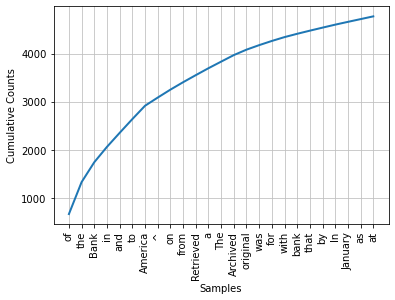

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [20]:
freq_nltk.plot(25, cumulative=True)

In [21]:
freq_nltk.plot(25, cumulative=False)

<AxesSubplot:xlabel='Samples', ylabel='Counts'>